In [1]:
import pandas as pd
import glob
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import style
style.use('default')
import matplotlib.patches as patches

In [2]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 0.5 #set the value globally
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 8

mpl.rc('font',**{'family':'sans-serif','serif':['Arial']})
mpl.rcParams['pdf.fonttype'] = 42

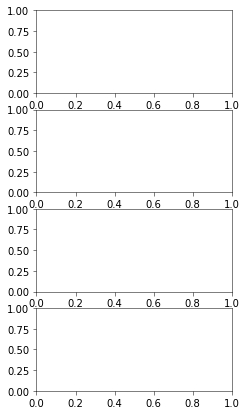

In [20]:
shapes = ['c-1', 'c-2','c-3', 'c-10']
w = 7 #half width = 3.5, full width = 7 
h = 7 # square-ish figure

# gridspec inside gridspec
f, ax = plt.subplots(4,1,figsize = (w/2,h))

In [4]:
outpath_fig = './dataFolders/Output/Figures/v2/'
outpath = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2/'

In [33]:
# do the fit for three different y0 - computed assuming the slope = 0 for 1/2 of the data
shapes = ['c-1', 'c-2','c-3', 'c-10']

for floralShape, axes in zip(shapes, ax):
    
    axes.cla()
    
    file  = glob.glob(outpath + floralShape + '_Alltrials.csv')
    new_df = pd.read_csv(file[0])
    
    
    xdata = new_df.MothIn.values/100
    ydata = new_df.DiscoveryTime.values/100
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].MothIn.values/100
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values/100
    numMoth = len(new_df.name.unique())

    numSuccVisits = len(ydata_notnan)
   
    #plot
    axes.plot(xdata, ydata, 'ok', 
              markersize=3, 
              markerfacecolor = '#808080',
              markeredgewidth = 0.5,
              alpha = 0.5)
    print(max(xdata/60))
#     axes.set_xlim([-3,65])
    axes.set_ylim([0,60])

34.716166666666666
32.969833333333334
32.2725
34.25066666666667


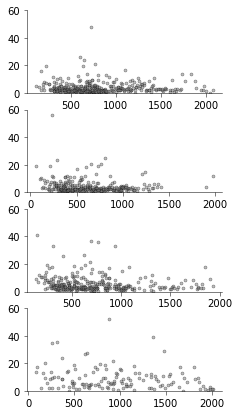

In [34]:
f

In [35]:
# add emblishments
for aa in ax[:-1]:
    plt.setp(aa.get_xticklabels(), visible=False)
    
for aa in ax:
    aa.tick_params(direction = 'out', axis='both')
    aa.spines['top'].set_visible(False)
    aa.spines['right'].set_visible(False)

ax[2].set_ylabel('Exploration Time (second)')
ax[3].set_xlabel('Time (second)')

Text(0.5, 3.200000000000003, 'Time (second)')

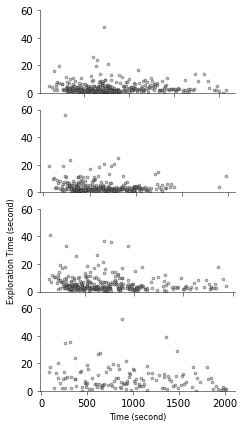

In [36]:
f

In [37]:
f.savefig(r"./dataFolders/Output/Figures/v2/FinalFigures/" + 'learningCurvesWithTime.pdf')